In [233]:
from scipy.stats import norm, gamma
import numpy as np
import matplotlib.pyplot as plt

$\mathbb{P}\left(M_t \leq m\right)$

In [234]:
m = np.linspace(0,100, 10_000)

mu = 1
sigma = 5
t = 10

Pm = norm.cdf( (m - mu*t)/(sigma*np.sqrt(t))) - np.exp( (2*m*mu)/sigma**2 )*norm.cdf(- (m+mu*t)/(sigma*np.sqrt(t)))

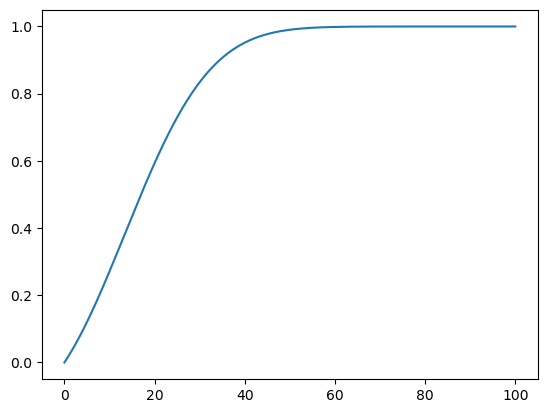

In [235]:
plt.plot(m,Pm)

$f_{T_l}(t)$

In [250]:
l=1000
mu=0.1
sigma=10
tspan = [0, 2*l/mu]

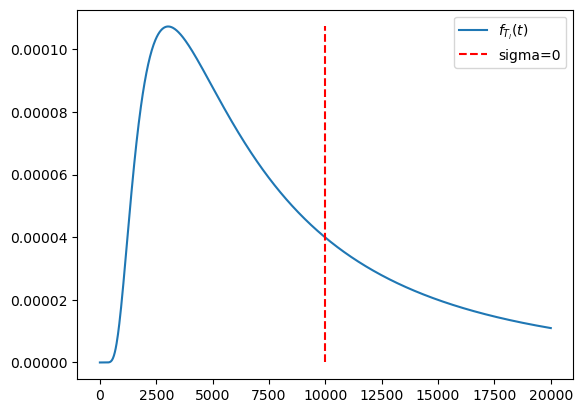

In [251]:
t = np.linspace(0.1,tspan[1],1_000)

ft_first = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t))
ft = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t)) + np.exp(2*l*mu/sigma**2) * norm.pdf(- (l+mu*t)/(sigma*np.sqrt(t)))*((l-mu*t)/(2*sigma*np.power(t,3/2)))

fig, ax = plt.subplots(1,1)
ax.plot(t,ft, label="$f_{T_l}(t)$")
# ax.plot(t,ft_first, "r", label="$f_{T_l}$[1]")
ax.vlines(l/mu, min(ft[ft==ft]), max(ft[ft==ft]), colors="r", linestyles="dashed", label="sigma=0")
ax.legend();

Monte-Carlo verification of $f_{T_l}$

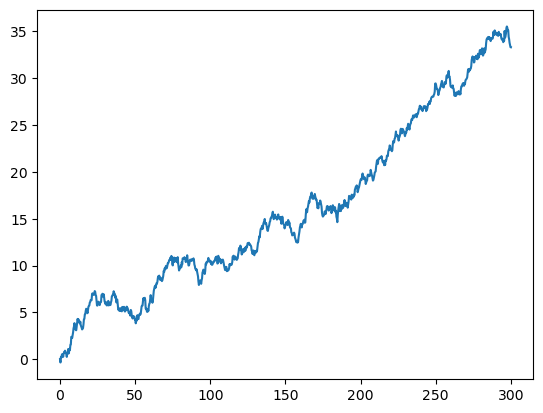

In [238]:
n = 100_000       # Number of simulations
nt = 1_000      # fineness of simulation

tt = np.linspace(tspan[0], tspan[1], num = nt + 1)
dt = (tspan[1] - tspan[0]) / nt

t = np.concatenate( (np.zeros((n,1)), norm.rvs(size = (n,nt))), axis=1) * np.sqrt(dt)
t = sigma*np.cumsum(t, axis=1) + mu*tt


plt.plot(tt,t[0,:])

In [239]:
T = np.argmax(t >= l, axis=1)

i_succes_sim = np.max(t, axis=1) > l
T = T[i_succes_sim]*dt

print(f"{i_succes_sim.mean()*100}% sim succeeded")

99.51299999999999% sim succeeded


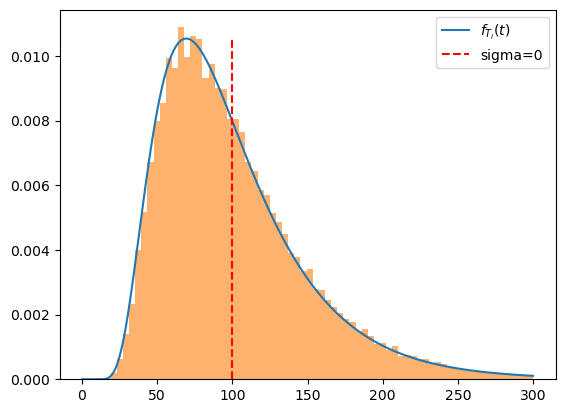

In [240]:
h = ax.hist(T, bins=70, density=True, alpha=0.6)
fig

Gamma approximation (fit to simulation)

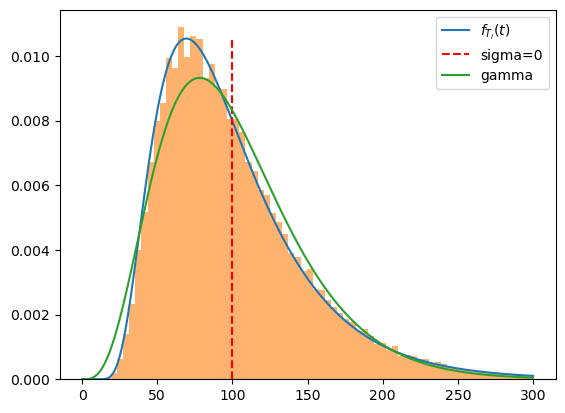

In [241]:
# mean
mean = T.mean()

# variance
var = T.var()

theta = var/mean
k = mean/theta

tt = np.linspace(0,tspan[1], 1_000)
ft_gamma = gamma.pdf(tt, k, scale=theta)

# Plot
ax.plot(tt,ft_gamma, label="gamma")
ax.legend()
fig